<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP__Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

In [0]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200) *0.1
series1 = np.sin(np.arange(200)) # This one will make a lot of curves

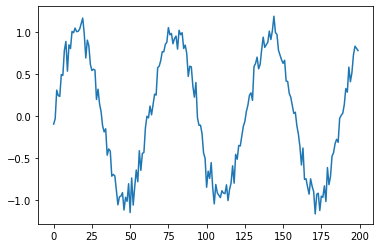

In [103]:
plt.plot(series);


In [104]:
T = 10
X = []  # X is a list so cannot do shape
Y = []  # Y is also a list at first

# We are using the function below to loop through the series to get the X(features) and Y(target)
# So after this function, X will contain 190 lists of a time step in the series. 190 of : [0 to 10], [1 to 11], [2 to 12] and Y will be the [11 from the first X1] etc
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x) 
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)  # 190 row of 10 features
Y = np.array(Y)  # We don't need to reshape this cos the Y is the target liao
N = len(X)
print("X shape is:", X.shape)
print("Y shape is:", Y.shape)
print("Length of X is:", N)

X shape is: (190, 10)
Y shape is: (190,)
Length of X is: 190


# Building the Model

In [0]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

# Training the Model

In [106]:
r = model.fit(X[:-N//2],Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs = 80)

Epoch 1/80
3/3 [==============================] - 0s 23ms/step - loss: 0.6760 - val_loss: 0.4515
Epoch 2/80
3/3 [==============================] - 0s 12ms/step - loss: 0.2830 - val_loss: 0.1064
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1120 - val_loss: 0.0472
Epoch 4/80
3/3 [==============================] - 0s 85ms/step - loss: 0.0390 - val_loss: 0.0530
Epoch 5/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0758 - val_loss: 0.0662
Epoch 6/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0803 - val_loss: 0.0786
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0867 - val_loss: 0.0568
Epoch 8/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0573 - val_loss: 0.0425
Epoch 9/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0417 - val_loss: 0.0250
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0297 - val_loss: 0.0259
Epoch 11/80
3/3 [============

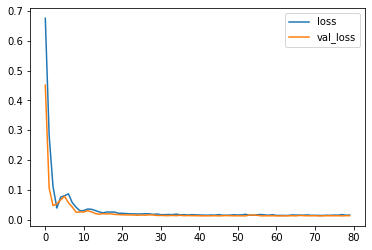

In [107]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend();

# Wrong method to forecast

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2 # Index of first validation input

while len(validation_target) > len(validation_predictions):
  p = model.predict(X[i].reshape(1,-1))[0,0]   # We have to index the array at [0,0] to get the actual scalar value within once the model has predicted an output
  i+=1

  validation_predictions.append(p)

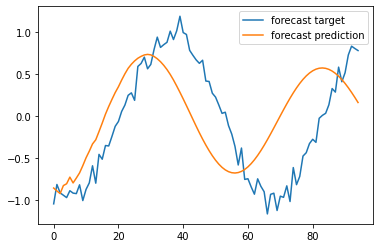

In [110]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

# Correct method of forecasting

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2] # Index of first validation input which is the last half of the X data

while len(validation_target) > len(validation_predictions):
  p = model.predict(last_x.reshape(1,-1))[0,0]

  validation_predictions.append(p)
  last_x = np.roll(last_x,-1)  # This code will shift the x to the left by 1 spot
  last_x[-1] = p               # Once it has moved back by 1 point, the x at the end is replaced by the predictions and the loop continues


  

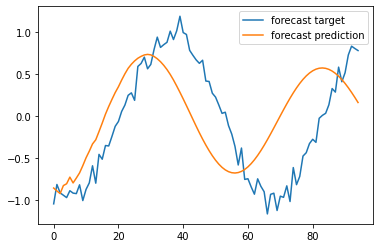

In [111]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [87]:
X[-1]

array([0.02207794, 0.19631025, 0.37314813, 0.52422532, 0.65692935,
       0.54345965, 0.79711985, 0.68758787, 0.77005196, 0.70003898])

In [85]:
X

array([[-0.31001845,  0.1459656 ,  0.27692693, ...,  0.63176629,
         0.75422123,  0.60579615],
       [ 0.1459656 ,  0.27692693,  0.43750384, ...,  0.75422123,
         0.60579615,  0.85680137],
       [ 0.27692693,  0.43750384,  0.39690544, ...,  0.60579615,
         0.85680137,  0.90564451],
       ...,
       [-0.19377833, -0.14073202,  0.02207794, ...,  0.54345965,
         0.79711985,  0.68758787],
       [-0.14073202,  0.02207794,  0.19631025, ...,  0.79711985,
         0.68758787,  0.77005196],
       [ 0.02207794,  0.19631025,  0.37314813, ...,  0.68758787,
         0.77005196,  0.70003898]])

In [99]:
X[-1:]

array([[0.02207794, 0.19631025, 0.37314813, 0.52422532, 0.65692935,
        0.54345965, 0.79711985, 0.68758787, 0.77005196, 0.70003898]])

In [0]:
X[-]